Populating the interactive namespace from numpy and matplotlib
bootstrap_test.ipynb  forwardmodel_test.ipynb  fwd_model_test.py  __init__.py  powerspectrum_test.ipynb  tmp
'03/19/2015 01:36:30 PM' :: libbootstrappy :: INFO :: Reading subsurface reflectance from file
'03/19/2015 01:36:30 PM' :: libbootstrappy :: INFO :: Reading :: /home/marrabld/Projects/phd/test_dataset/bootstrappy_test/1_batch_report.csv :: and interpolating to [[ 410.  430.  450.  470.  490.  510.  530.  550.  570.  590.  610.  630.
   650.  670.  690.  710.  730.]]
'03/19/2015 01:36:30 PM' :: libbootstrappy :: INFO :: Reading backscattering
'03/19/2015 01:36:30 PM' :: libbootstrappy :: INFO :: Reading :: ../inputs/iop_files/bb.csv :: and interpolating to [[ 410.  430.  450.  470.  490.  510.  530.  550.  570.  590.  610.  630.
   650.  670.  690.  710.  730.]]
'03/19/2015 01:36:30 PM' :: libbootstrappy :: INFO :: Reading total absorption
'03/19/2015 01:36:30 PM' :: libbootstrappy :: INFO :: Reading :: ../inputs/iop_

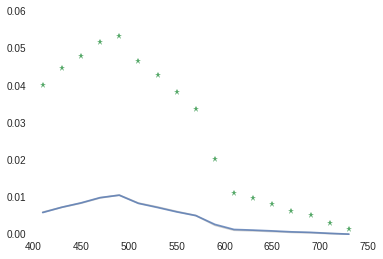

In [22]:
%pylab inline

import sys
import seaborn as sns

import numpy as np
import scipy

# !mkdir tmp
!ls
import sys
sys.path.append("..")

import libbootstrap
import libbootstrap.deconv

rrs_file = '/home/marrabld/Projects/phd/test_dataset/bootstrappy_test/1_batch_report.csv'
# np.savetxt(rrs_file, np.vstack((sm.wave, np.real(sub_Rrs))), delimiter=',');

wavelengths = scipy.asarray([410.0, 430.0, 450.0, 470.0, 490.0, 510.0, 530.0, 550.0, 570.0, 590.0, 610.0, 630.0, 650.0, 670.0, 690.0, 710.0, 730.0])
dc = libbootstrap.deconv.HopeDeep(wavelengths);

dc.read_rrs_from_file(rrs_file);
dc.read_all_iops_from_files();

data = dc.run(num_iters=1);
print(data)
check = dc.func(data[0])
forward = dc.func([0.01, 0.1, 0.05, 0.05])  # P, m, d, G [0.01 0.1 0.0 0.1]
#import pylab

#for row in sub_Rrs:
print(dc.rrs.shape)
pylab.plot(wavelengths, dc.rrs[0, :], color= '0.75', alpha = 0.75)
    
pylab.plot(wavelengths, check, alpha = 0.75)
pylab.plot(wavelengths, forward, '*')
    
pylab.show()

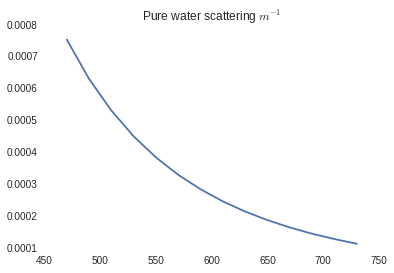

In [16]:
plot(wavelengths, dc.b_bw[0,:])
title(r'Pure water scattering $m^{-1}$')

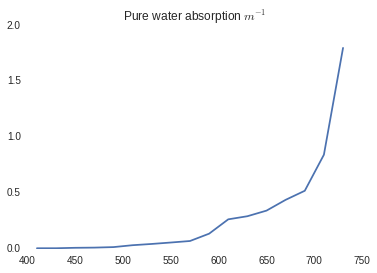

In [29]:
plot(wavelengths, dc.aw[0, :])
title(r'Pure water absorption $m^{-1}$')